In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

from datetime import datetime 
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.spatial import distance

sns.set_style('white')
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv', header=None, error_bad_lines=False)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
1,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
2,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
3,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
4,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95


In [4]:
# get data shape before altering df

df.shape

(31985, 21)

In [5]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20],
           dtype='int64')

In [6]:
df.iloc[0]

0           10k
1          name
2      division
3           25k
4        gender
5           age
6      official
7           bib
8     genderdiv
9           ctz
10          35k
11      overall
12         pace
13        state
14          30k
15           5k
16         half
17          20k
18      country
19         city
20          40k
Name: 0, dtype: object

In [7]:
# rename columns 
df = df.rename(columns={0 : '10k', 1 : 'name', 2 : 'division', 3 : '25k', 4 : 'gender', 5 : 'age', 
                              6 :'official', 7 : 'bib', 8 : 'genderdiv', 9 : 'ctz', 10 : '35k',
                              11 : 'overall', 12 : 'pace', 13 : 'state', 14 : '30k', 15 : '5k', 
                             16 : 'half', 17 : '20k', 18 : 'country', 19 : 'city', 20 : '40k'})

In [8]:
# drop row 0 containing column names

df = df.drop(df.index[[0]])

In [9]:
# verify row dropped

df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
1,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
2,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
3,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
4,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
5,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [10]:
# drop duplicates

df = df.drop_duplicates()

In [11]:
# sum null values by column

df.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [12]:
# drop columns with null values

df = df.drop('ctz', 1)

In [13]:
# remove hyphens from columns

df = df.replace('-','', regex=True)

In [14]:
df.columns = pd.Series(df.columns).str.strip()

In [15]:
df.shape

(31984, 20)

In [16]:
df['division'] = df['division'].astype(float)
df['division'].describe()

count   31984.000
mean     1932.563
std      1715.229
min         1.000
25%       610.000
50%      1425.000
75%      2611.000
max      6979.000
Name: division, dtype: float64

In [17]:
df['age'] = df['age'].astype(float)
df['age'].describe()

count   31984.000
mean       42.407
std        11.316
min        18.000
25%        33.000
50%        42.000
75%        50.000
max        81.000
Name: age, dtype: float64

In [18]:
df['official'] = df['official'].astype(float)
df['official'].describe()

count   31984.000
mean      242.997
std        52.300
min        80.600
25%       205.528
50%       232.370
75%       273.235
max       538.880
Name: official, dtype: float64

In [19]:
df['genderdiv'] = df['genderdiv'].astype(float)
df['genderdiv'].describe()

count   31984.000
mean     8051.045
std      4754.006
min         1.000
25%      3972.000
50%      7970.000
75%     11968.000
max     17575.000
Name: genderdiv, dtype: float64

In [20]:
df['overall'] = df['overall'].astype(float)
df['overall'].describe()

count   31984.000
mean    15939.588
std      9232.978
min         1.000
25%      7943.750
50%     15939.500
75%     23935.250
max     31931.000
Name: overall, dtype: float64

In [21]:
df['pace'] = df['pace'].astype(float)
df['pace'].describe()

count   31984.000
mean        9.276
std         1.992
min         3.080
25%         7.850
50%         8.870
75%        10.430
max        20.570
Name: pace, dtype: float64

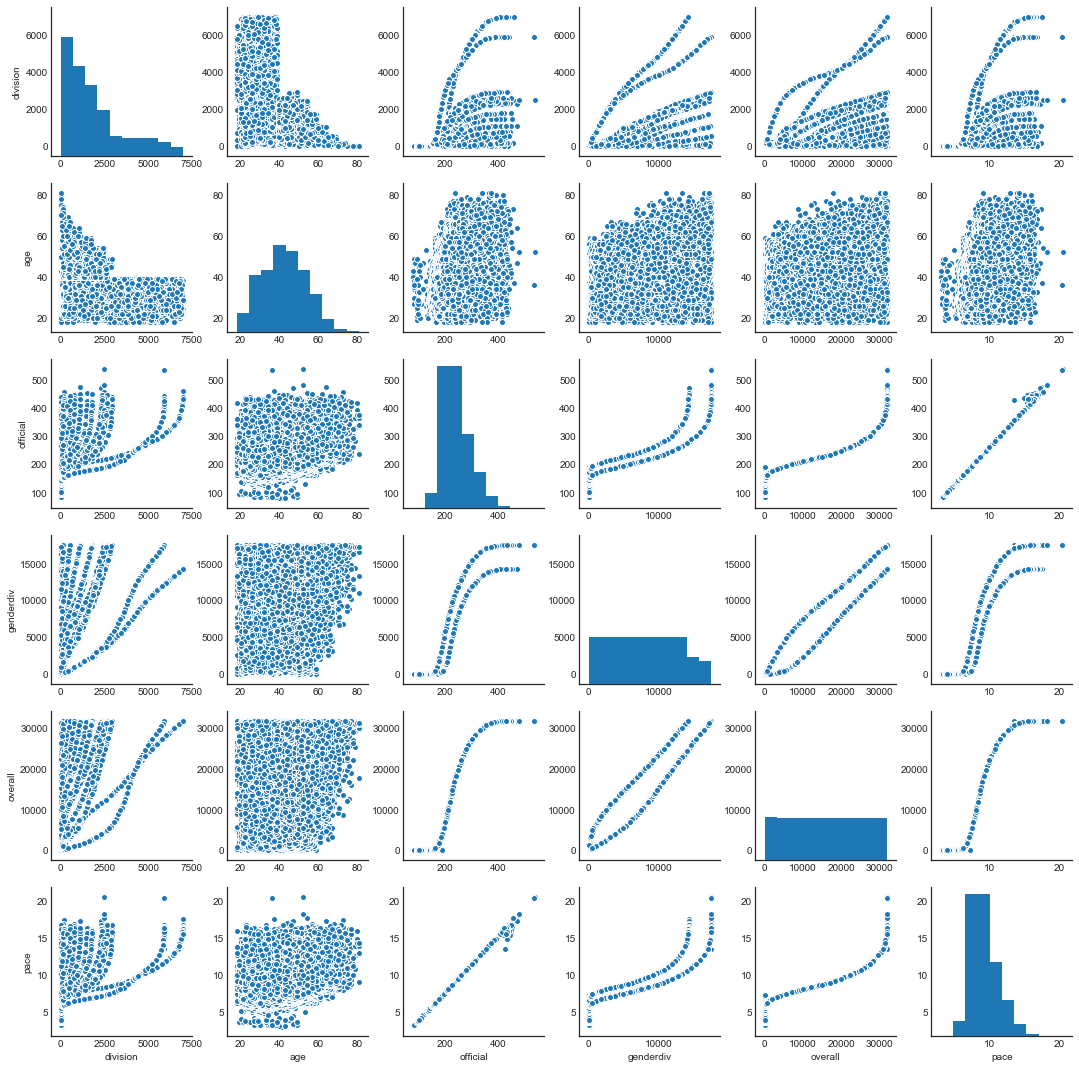

In [22]:
sns.pairplot(data=df)

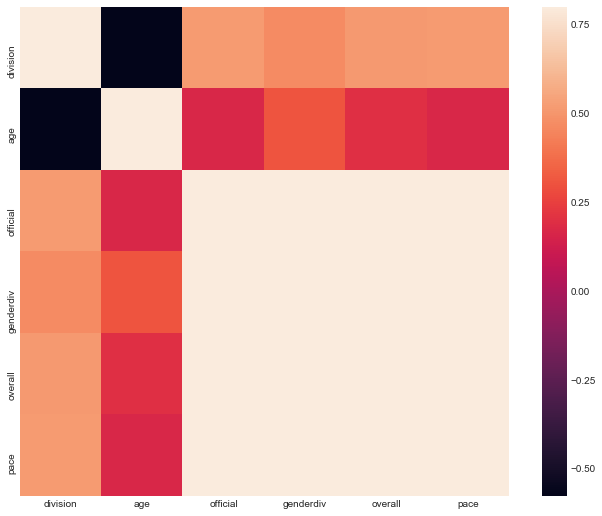

In [23]:
corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [24]:
features = pd.get_dummies(df['gender'])

In [25]:
features['division'] = df['division']
features['age'] = df['age']
features['pace'] = df['pace']
features['overall'] = df['overall']
features['genderdiv'] = df['genderdiv']
features['official'] = df['official']

In [26]:
# In case some of the variables are on different scales than others, scale them before averaging by subtracting the 
# average of each variable from all values in that variable, then dividing by the standard deviation.

means = df[['age','division','pace', 'overall', 'genderdiv', 'official']].mean(axis=0)
stds = df[['age','division','pace', 'overall', 'genderdiv', 'official']].std(axis=0)
features['age_pace_gender'] = ((df[['age','division','pace', 'overall', 'genderdiv', 'official']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.

plotdf = df.loc[:, ['age','division','pace', 'overall', 'genderdiv', 'official']]
plotdf['age_pace_gender'] = features['age_pace_gender'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                   age  division  pace  overall  genderdiv  official  \
age              1.000    -0.577 0.167    0.201      0.307     0.166   
division        -0.577     1.000 0.516    0.514      0.471     0.515   
pace             0.167     0.516 1.000    0.955      0.879     1.000   
overall          0.201     0.514 0.955    1.000      0.909     0.954   
genderdiv        0.307     0.471 0.879    0.909      1.000     0.878   
official         0.166     0.515 1.000    0.954      0.878     1.000   
age_pace_gender  0.271     0.523 0.969    0.973      0.954     0.969   

                 age_pace_gender  
age                        0.271  
division                   0.523  
pace                       0.969  
overall                    0.973  
genderdiv                  0.954  
official                   0.969  
age_pace_gender            1.000  


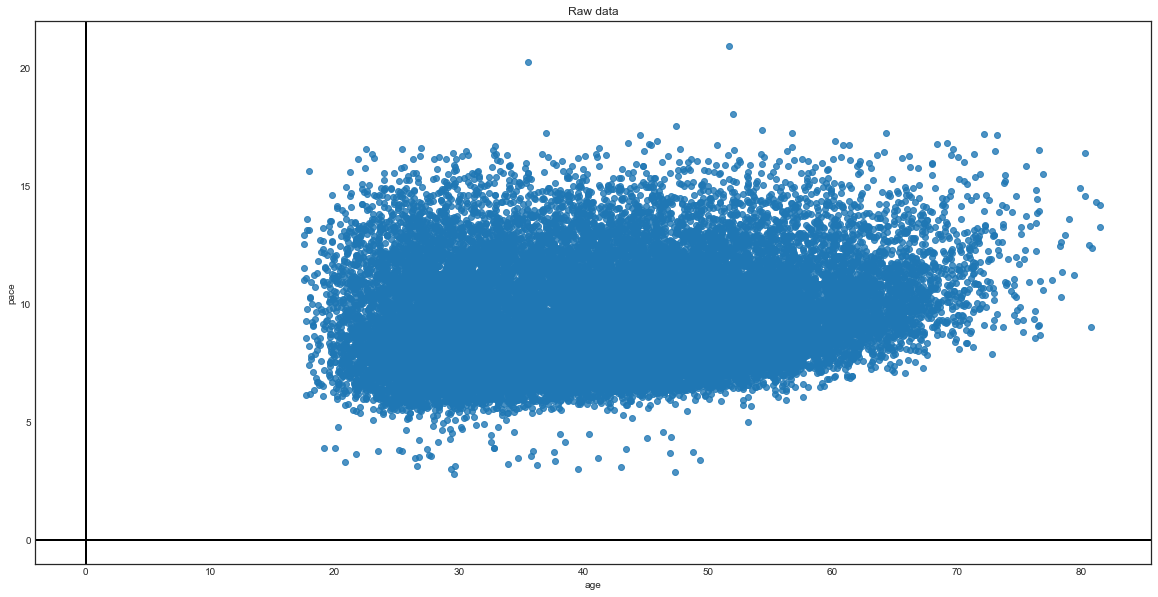

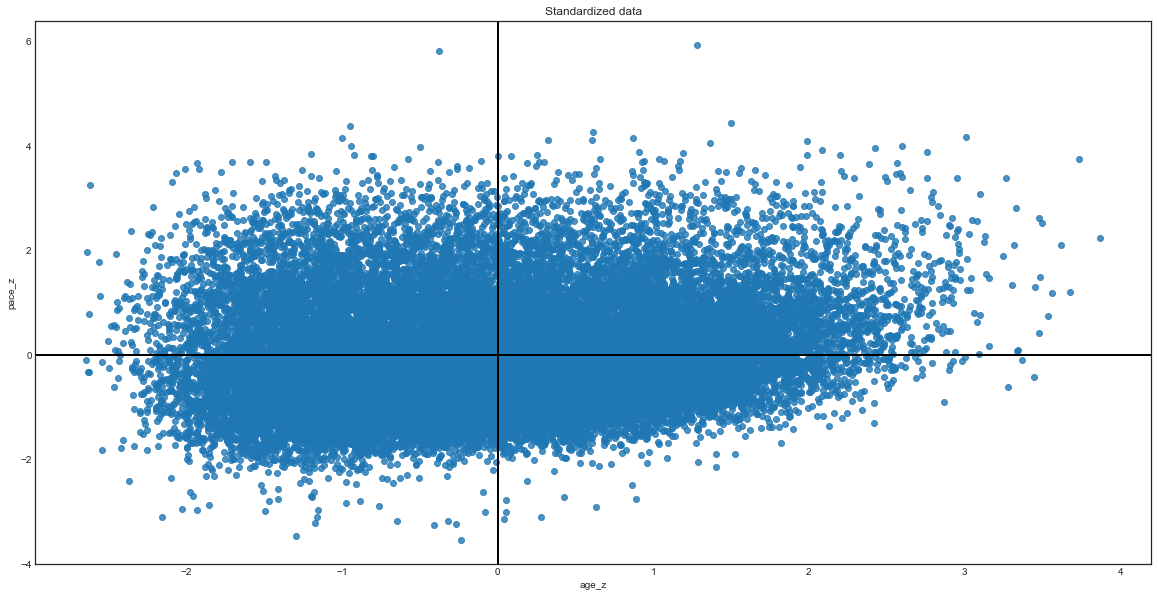

In [27]:
# Make the scatterplot matrix.

# Take a subset of the data for PCA.

df_pca = df.loc[:, ['age', 'division', 'pace', 'overall', 'genderdiv', 'official']]

t = sns.regplot(
    'age',
    'pace',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

# Standardize variables by subtracting the mean and dividing by the standard deviation so both variables are on the 
# same scale.

df_pca['age_z'] = (df_pca['age'] - df_pca['age'].mean()) / df_pca['age'].std()
df_pca['pace_z'] = (df_pca['pace'] - df_pca['pace'].mean()) / df_pca['pace'].std()

t = sns.regplot(
    'age_z',
    'pace_z',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()

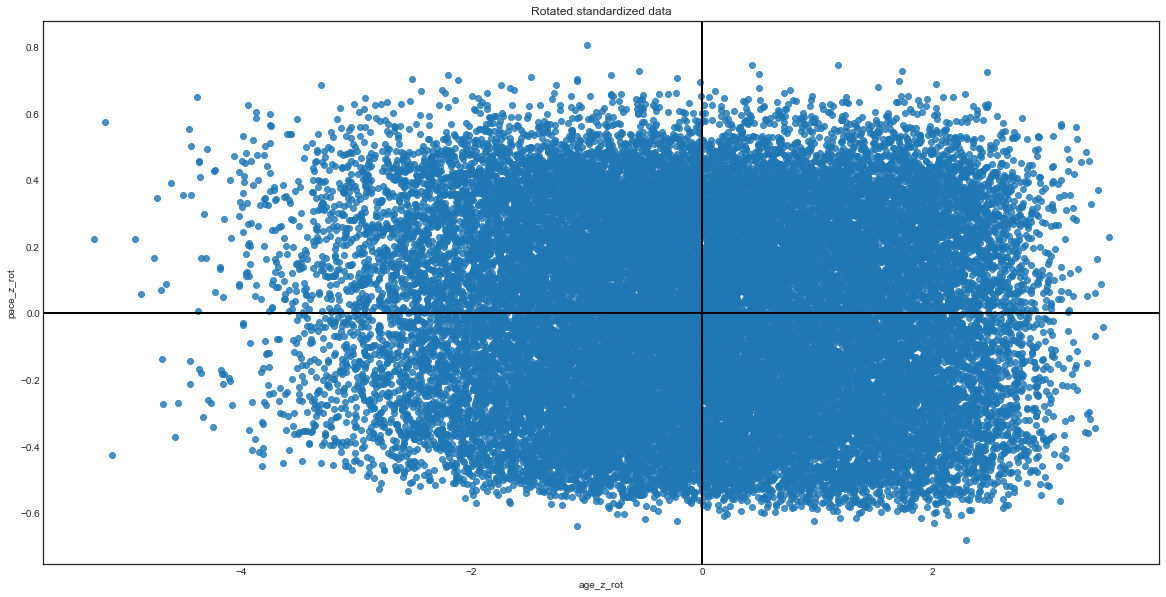

In [28]:
# Rotating the data so that the axes roughly match to vector above.
df_pca['age_z_rot'] = math.cos(40) * df_pca['age_z'] - math.sin(40) * df_pca['age_z']
df_pca['pace_z_rot'] = math.sin(40) * df_pca['pace_z'] + math.cos(40) * df_pca['pace_z']

t = sns.regplot(
    'age_z_rot',
    'pace_z_rot',
    df_pca,
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated standardized data')
plt.show()

In [29]:
# Take a subset of the data for PCA 

df_pca = df.loc[:, ['age','division','pace', 'overall', 'genderdiv', 'official']]

# Normalize the data so that all variables have a mean of 0 and standard deviation of 1.

X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes variables are represented by rows, not columns, so transpose X.

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00003127 -0.57727394  0.16659783  0.20113548  0.30683837  0.16644485]
 [-0.57727394  1.00003127  0.5156488   0.51450935  0.47076702  0.51538454]
 [ 0.16659783  0.5156488   1.00003127  0.95479529  0.87881615  0.9999283 ]
 [ 0.20113548  0.51450935  0.95479529  1.00003127  0.90923396  0.95426239]
 [ 0.30683837  0.47076702  0.87881615  0.90923396  1.00003127  0.87838776]
 [ 0.16644485  0.51538454  0.9999283   0.95426239  0.87838776  1.00003127]]


In [30]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 6).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.07322429]
 [ 0.29349454]
 [ 0.48207892]
 [ 0.4806639 ]
 [ 0.46128926]
 [ 0.48194761]]
Eigenvalue 1: 4.131834382315277
----------------------------------------
Eigenvector 2: 
[[-0.7795611 ]
 [ 0.60825363]
 [-0.03639971]
 [-0.05649615]
 [-0.12834483]
 [-0.03637123]]
Eigenvalue 2: 1.5310882798140508
----------------------------------------
Eigenvector 3: 
[[ 0.36026298]
 [ 0.51847929]
 [-0.38855077]
 [-0.10464857]
 [ 0.53583471]
 [-0.39031776]]
Eigenvalue 3: 0.20717553783485532
----------------------------------------
Eigenvector 4: 
[[ 0.50655243]
 [ 0.52430749]
 [ 0.16409108]
 [-0.12138901]
 [-0.63200144]
 [ 0.16558772]]
Eigenvalue 4: 0.07987274372022744
----------------------------------------
Eigenvector 5: 
[[ 0.02319296]
 [ 0.01301255]
 [-0.29240046]
 [ 0.86027101]
 [-0.29016404]
 [-0.29922125]]
Eigenvalue 5: 0.05011530581211691
----------------------------------------
Eigenvector 6: 
[[  4.84159957e-05]
 [  1.70711317e-04]
 [ -7.09139878e-01]
 [  4.19264129e-0

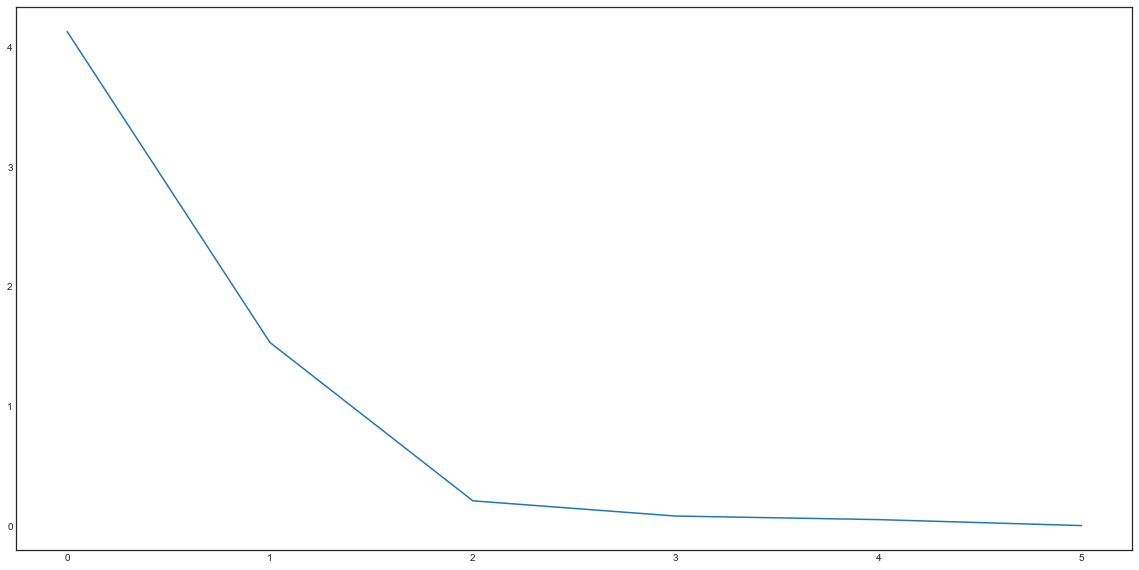

In [31]:
plt.plot(eig_val_cov)
plt.show()

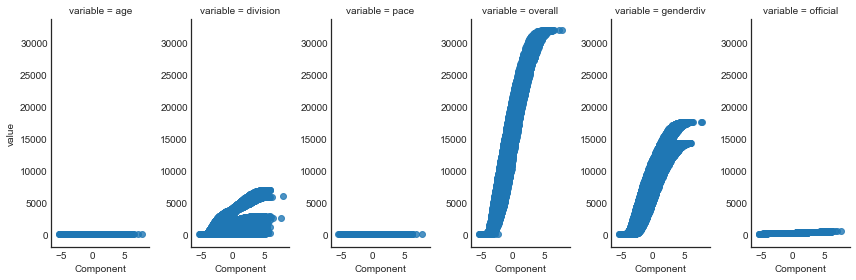

In [32]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

# Combine X and Y for plotting purposes.
data_to_plot = df_pca[['age','division','pace', 'overall', 'genderdiv', 'official']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.68861753  0.2551734   0.03452818  0.01331171]


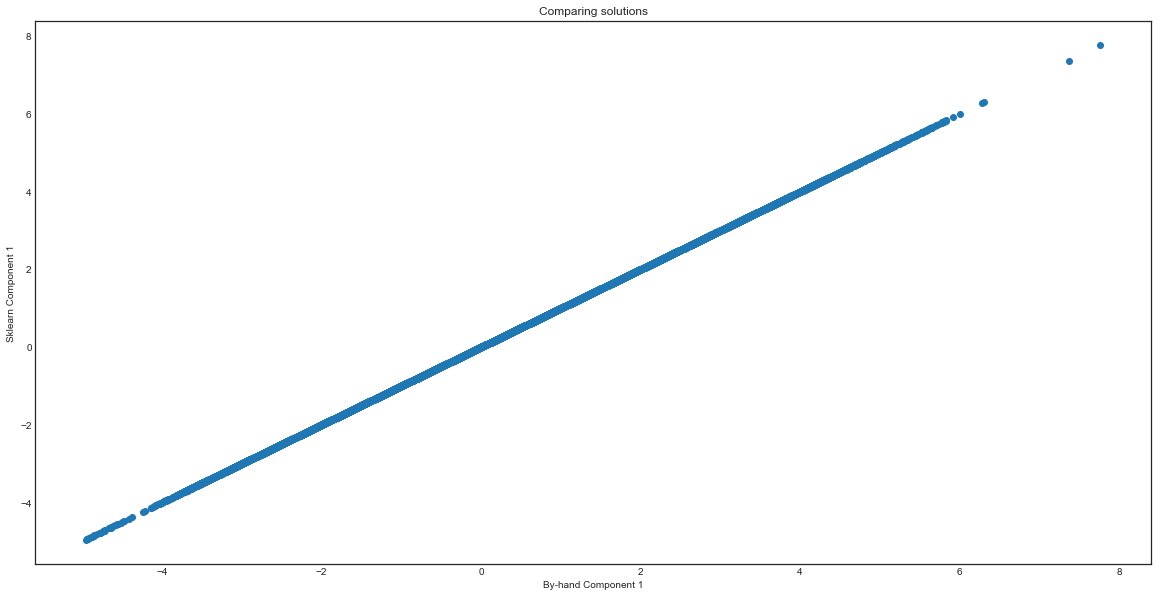

In [33]:
sklearn_pca = PCA(n_components=4)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

Runtime for k-means:
0:00:00.000340


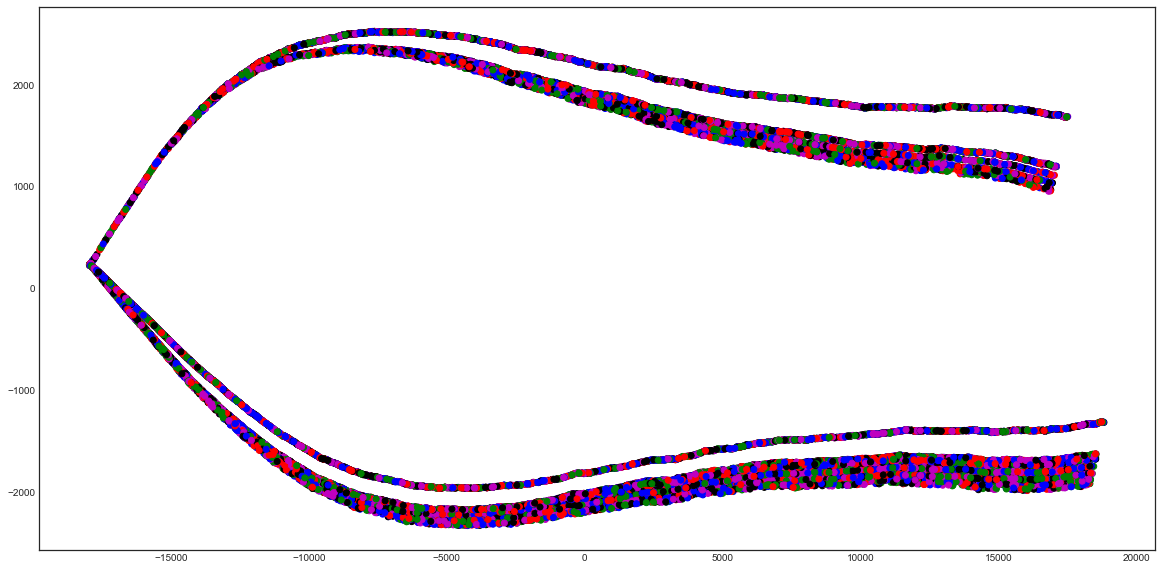

In [34]:
# K-Means
# Define the features and the outcome.
X = df_pca

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values.
km = KMeans(n_clusters=5, random_state=42).fit_predict(X_pca)

startTime = datetime.now()
print('Runtime for k-means:')
print(datetime.now() - startTime)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='kmbrg')
plt.show()

In [35]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=300, 
    verbose=False)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
 
predict_mini = minibatchkmeans.predict(X_pca)

print('Runtime for mini batch k-means:')
print(datetime.now() - startTime)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, km))

Runtime for mini batch k-means:
0:00:02.186796
Comparing k-means and mini batch k-means solutions:
col_0     0     1     2     3     4
row_0                              
0      5281     0     0  6365     0
1      1063  3152     0     0  6430
2         0  3472  6221     0     0


**K-means is not a good clustering method for this dataset because the distances between data points cann't be accurately calculated using euclidean distance.  K-means is implicitly based on euclidean distance, and this dataset contains discrete and continuous variables, which requires the use of a different distance measurement.**  

**Changed the distance metric from euclidean to mahalanobis since mahalanobis is capable of measuring distances between both discrete and continuous variables within a dataset.**

In [36]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import mahalanobis

In [37]:
items_mat = np.array(df_pca.sample(12000).values)
dist_out = 1-pairwise_distances(items_mat, metric='mahalanobis')

Runtime for k-means:
0:00:00.002855


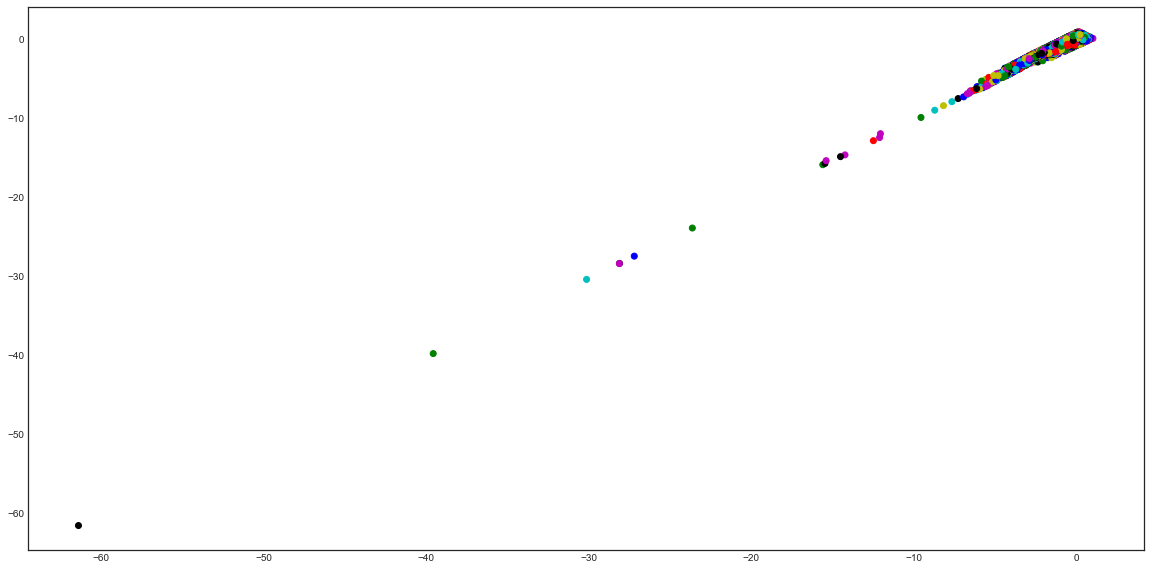

In [44]:
# K-Means

# Calculate predicted values.
km = KMeans(n_clusters=8, random_state=42).fit_predict(dist_out)

startTime = datetime.now()
print('Runtime for k-means:')
print(datetime.now() - startTime)

# Plot the solution.

plt.scatter(dist_out[:, 0], dist_out[:, 1], c='mykbgrc')
plt.show()

**After re-running k-means using the mahalanobis distance metric, the clusters 

In [41]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement. Arguments can be provided to the model, but were not.

af = AffinityPropagation().fit(dist_out)
print('Done')

print('Runtime for affinity propagation:')
print(datetime.now() - startTime)

# Pull the number of clusters and cluster assignments for each data point.

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Runtime for affinity propagation:
0:08:41.988359
Estimated number of clusters: 3723


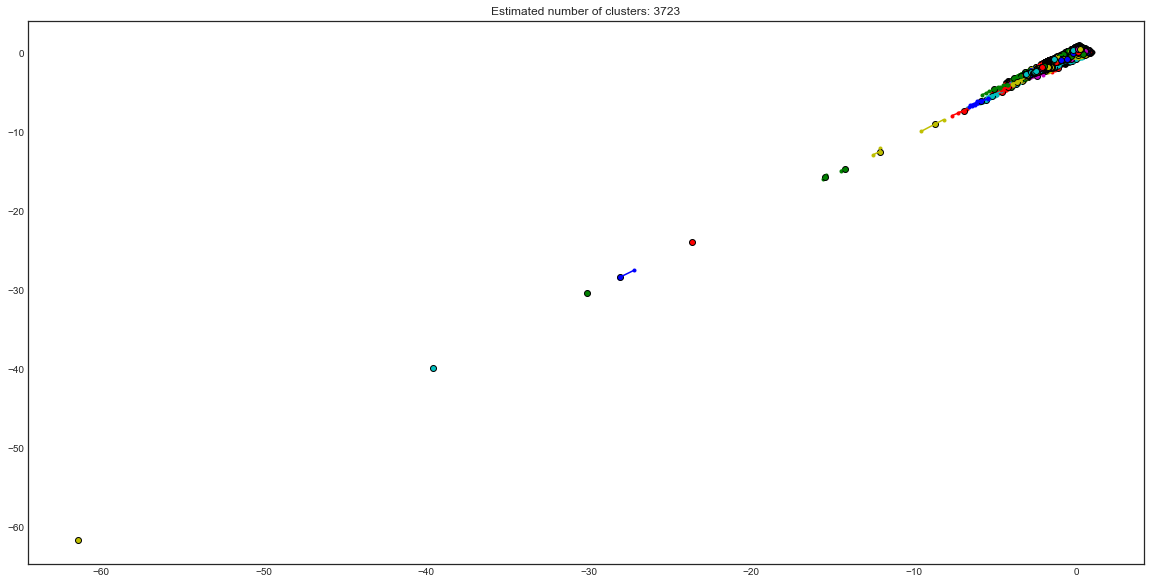

In [42]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the exemplar and lines from the exemplar to 
# each data point in the cluster.

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = dist_out[cluster_centers_indices[k]]
    plt.plot(dist_out[class_members, 0], dist_out[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in dist_out[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

**Affinity propagation estimates 3,723 clusters for 12,000 data points, which seems excessive.  It likely may be beneficial to use less clusters to improve separation between clusters.  Affinity propagation doesn't appar to be a good model for this dataset.**  

Number of estimated clusters: 1


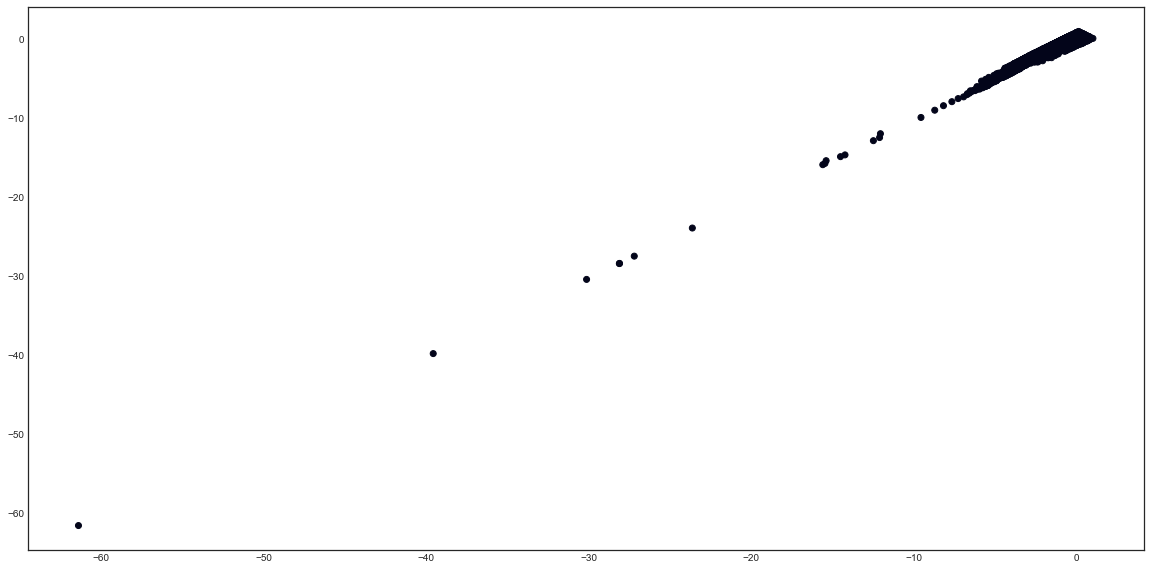

In [43]:
# MeanShift

from sklearn.cluster import MeanShift, estimate_bandwidth

# Set the bandwidth. This function automatically derives a bandwidth number based on an inspection of the 
# distances among points in the data.

bandwidth = estimate_bandwidth(items_mat, quantile=0.5)

# Declare and fit the model.

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(dist_out)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
plt.scatter(dist_out[:, 0], dist_out[:, 1], c=labels)
plt.show()

**Mean shift estimates 1 cluster, based on 12,000 data points.  Even using mahalanobis distance, mean shift doesn't appear to be a good clustering method for this dataset.**  

In [45]:
# add clusters to original df to compare against raw data
# convert cluster arrays to df 

km2 = pd.DataFrame(km)

cci = pd.DataFrame(cluster_centers_indices)

In [46]:
pd.concat([km2, cci], axis=1)

,0,0
0,1,1.000
1,1,4.000
2,7,5.000
3,5,9.000
4,5,15.000
5,3,16.000
6,5,21.000
7,6,23.000
8,5,26.000
9,5,32.000


In [47]:
df_pca.shape

(31984, 6)

In [48]:
df_pca.columns

Index(['age', 'division', 'pace', 'overall', 'genderdiv', 'official'], dtype='object')

In [56]:
df.head()

,0,0
0,13,8.000
1,8,16.000
2,12,33.000
3,0,49.000
4,12,82.000


In [54]:
cci.head()

,0
0,8
1,16
2,33
3,49
4,82


In [48]:
cluster_centers

array([[-1.81102958, -2.40264915, -1.85047883, ..., -1.61025174,
        -1.42604376, -2.12141254]])

In [51]:
n_clusters_

1

In [ ]:
from sklearn.cluster import SpectralClustering

n_clusters=8

# Declare and fit the model.

sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(items_mat)

#Predicted clusters.

predict=sc.fit_predict(dist_out)

# Graph results.

plt.scatter(dist_out[:, 0], dist_out[:, 1], c='bgrcmykbgrcmykbgrcmykbgrcmyk')
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(dist_out, predict))